In [7]:
# !pip install tensorflow
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\ses1_model_anat\implem')

Found 4137 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

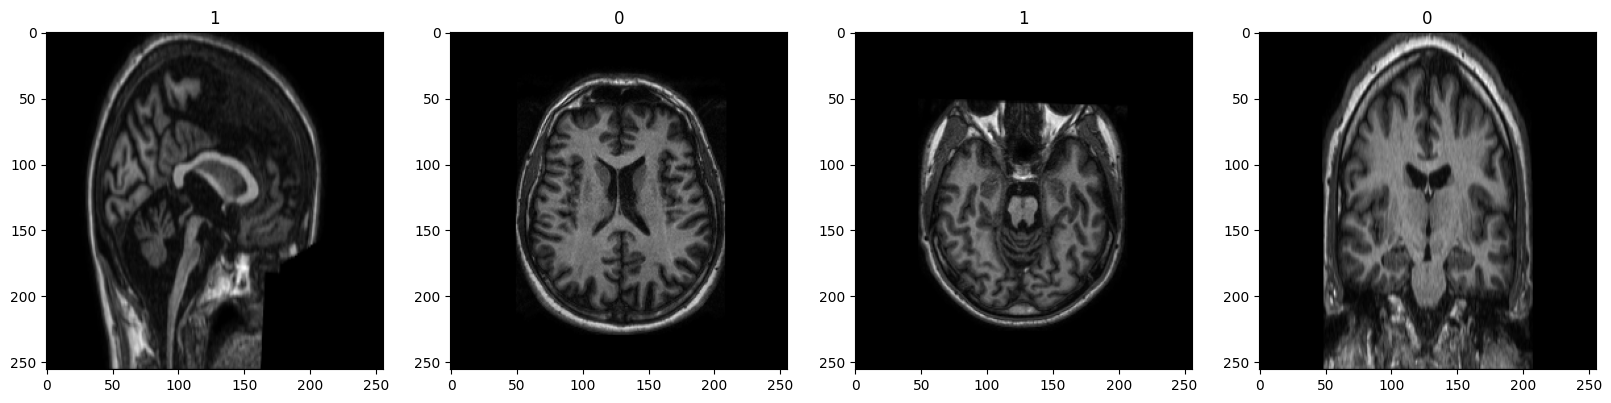

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()


(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

91

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
91/91 [==============================] - 99s 1s/step - loss: 0.2197 - accuracy: 0.9001 - val_loss: 0.0330 - val_accuracy: 0.9916
Epoch 2/30
91/91 [==============================] - 81s 886ms/step - loss: 0.0181 - accuracy: 0.9928 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3/30
91/91 [==============================] - 87s 950ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 5.0519e-04 - val_accuracy: 1.0000
Epoch 4/30
91/91 [==============================] - 77s 844ms/step - loss: 2.5753e-04 - accuracy: 1.0000 - val_loss: 2.1105e-04 - val_accuracy: 1.0000
Epoch 5/30
91/91 [==============================] - 78s 850ms/step - loss: 1.0710e-04 - accuracy: 1.0000 - val_loss: 1.7111e-04 - val_accuracy: 1.0000
Epoch 6/30
91/91 [==============================] - 87s 957ms/step - loss: 7.3288e-05 - accuracy: 1.0000 - val_loss: 1.3965e-04 - val_accuracy: 1.0000
Epoch 7/30
91/91 [==============================] - 76s 836ms/step - loss: 5.5892e-05 - accuracy: 1.0000 - val_loss: 

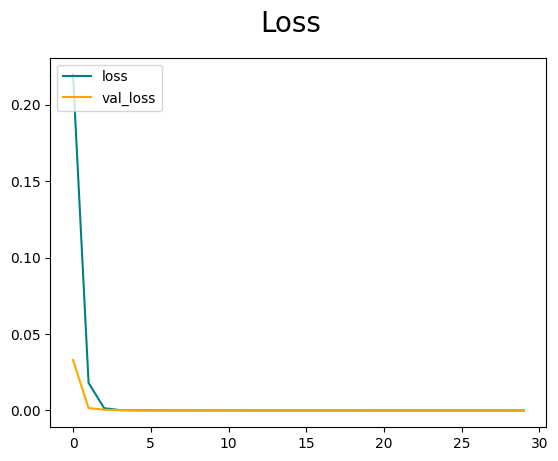

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

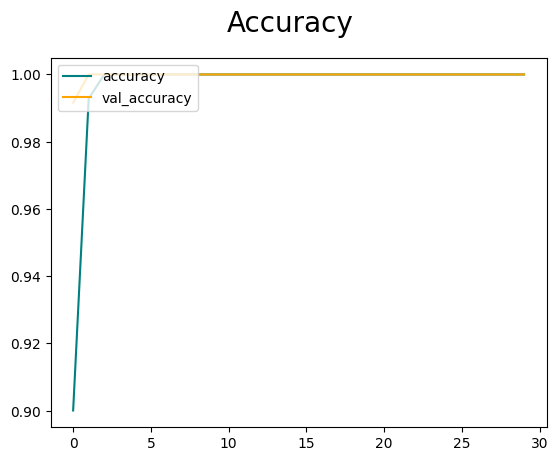

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 118ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [34]:
import cv2

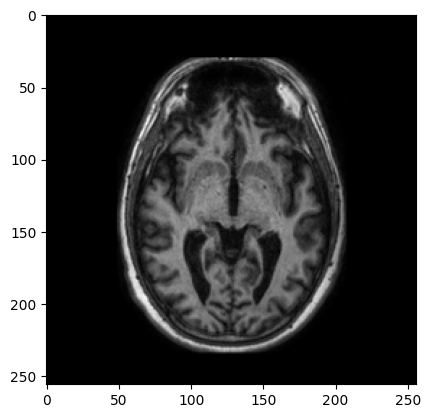

In [62]:
img = cv2.imread(r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\ses1_model_anat\implem\sca2_ses1\ses-01_sub-SCA202_ses-01_T1w.nii_slice_73_axial.png')
plt.imshow(img)
plt.show()

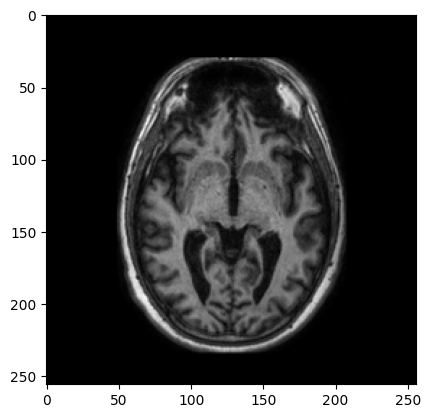

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(256, 256, 3), dtype=float32)


In [63]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

print(resize)

In [80]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [81]:
yhat

array([[1.]], dtype=float32)

In [82]:
if yhat > 0.5: 
    print(f'Predicted class is SCA2')
else:
    print(f'Predicted class is healthy')

Predicted class is SCA2


In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [84]:
import cv2
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import Image, display
import os

In [85]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5: 
    print(f'Predicted class is SCA2')
else:
    print(f'Predicted class is healthy')

1/1 [==============================] - 0s 40ms/step
Predicted class is SCA2


In [86]:
resizee = resize.numpy().astype(int)

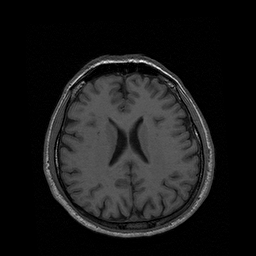

In [121]:

preprocess_input = tf.keras.applications.xception.preprocess_input
decode_predictions = tf.keras.applications.xception.decode_predictions

img_size = (256, 256)

# img_path = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\ses1_model_anat\test\test2.jpg'

img_path = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\ses1_model_anat\implem\control_ses1\ses-01_sub-control15_ses-01_T1w.nii_slice_98_axial.png'




last_conv_layer_name = 'conv2d_2'

display(Image(img_path))

In [122]:
def load_img(img_path, size=None):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    return img


def get_img_array(img_path, size):
    img_array = load_img(img_path, size)
    # We add a dimension to transform our array into a 'batch'
    # of size (1, 299, 299, 3)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


def get_preprocessed_img(img_path, size):
    img_array = get_img_array(img_path, size)
    return preprocess_input(img_array)

In [123]:
def generate_cam(img_array, model, last_conv_layer_name, pred_index=None, respond=False):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(
            last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Grad-CAM would introduce here a vector where each entry would be the mean
    # intensity of the gradient over a specific feature map channel (equivalent
    # to global average pooling)
    # pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # However, HiResCAM skips the gradient averaging step in order to retain
    # the relationship between the model explanation and the score calculation.

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class,
    # then sum all the channels to obtain the heatmap class activation.
    last_conv_layer_output = last_conv_layer_output[0]

    if respond:
        # Respond-CAM is fairly similar to HiResCAM but it uses weighted,
        # instead of raw, feature maps
        respond_weights = np.sum(last_conv_layer_output * grads, axis=(0, 1, 2)) / \
            (np.sum(last_conv_layer_output + 1e-10, axis=(0, 1, 2)))

        heatmap = last_conv_layer_output * respond_weights
    else:
        heatmap = last_conv_layer_output * grads
    heatmap = np.sum(heatmap, axis=-1)
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    # Notice that we clip the heatmap values, which is equivalent to applying ReLU
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 0s 38ms/step


Predicted: [[2.9192559e-27]]


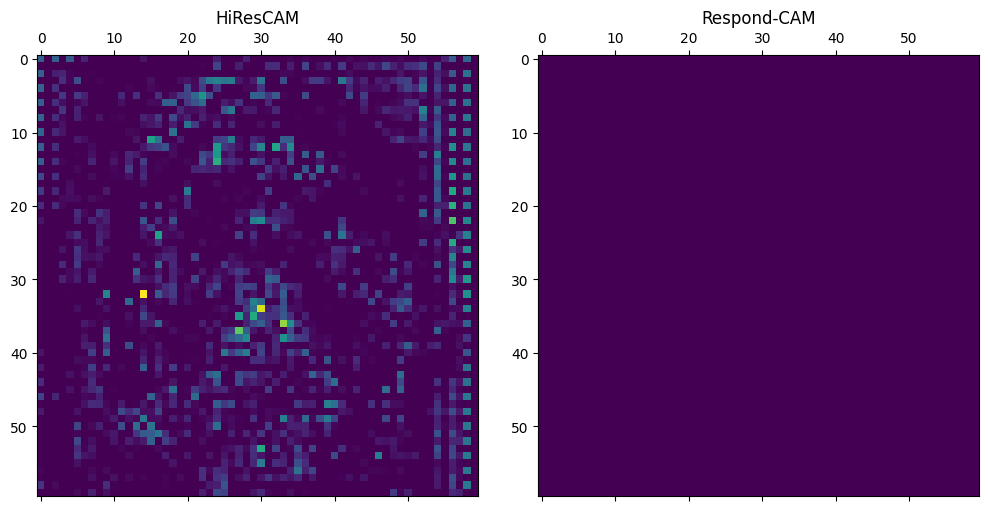

In [124]:
img_array = get_preprocessed_img(img_path, size=img_size)

model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print('Predicted:', preds)

# Generate class activation heatmap
heatmap = generate_cam(img_array, model, last_conv_layer_name)
respond_heatmap = generate_cam(
    img_array, model, last_conv_layer_name, respond=True)

# Display heatmap
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
axes = fig.subplots(1, 2)

axes[0].set_title('HiResCAM')
axes[0].matshow(heatmap)
axes[1].set_title('Respond-CAM')
axes[1].matshow(respond_heatmap)
plt.show()

In [125]:
def resize_heatmap(img_path, heatmap):
    # Load the original image
    img = load_img(img_path)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap('jet')

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    return jet_heatmap

In [126]:
resized_heatmap = resize_heatmap(img_path, heatmap)
resized_respond_heatmap = resize_heatmap(img_path, respond_heatmap)

C:\Users\rithv\AppData\Local\Temp\ipykernel_1298340\3870767909.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet')


In [127]:
def visualize_side_by_side(hirescam_img, respondcam_img):
    fig = plt.figure(constrained_layout=True, figsize=(20, 10))
    axes = fig.subplots(1, 2)

    axes[0].set_title('HiResCAM')
    axes[0].imshow(hirescam_img)
    axes[1].set_title('Respond-CAM')
    axes[1].imshow(respondcam_img)
    plt.show()

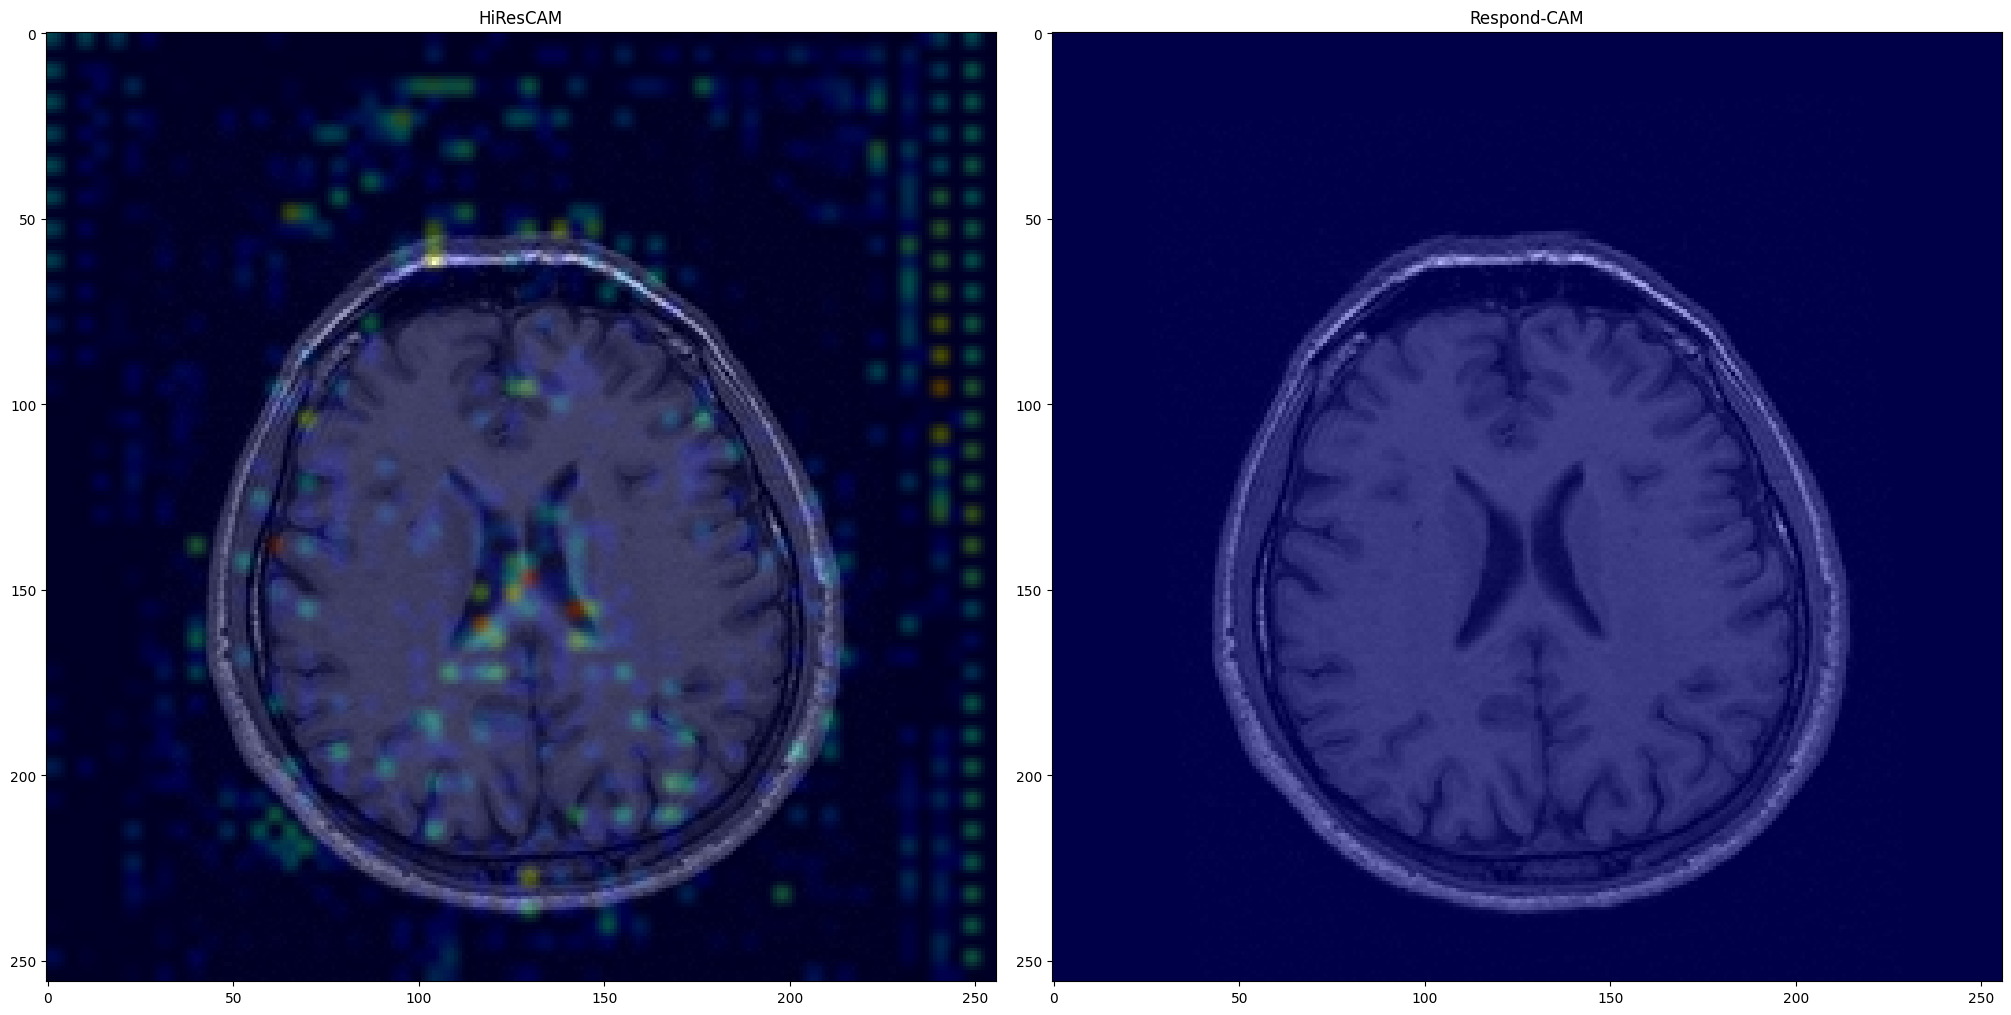

In [128]:
def superimpose_heatmap(img, heatmap, alpha=0.4):
    superimposed_img = heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(
        superimposed_img)

    return superimposed_img


original_img = load_img(img_path)
superimposed_img = superimpose_heatmap(original_img, resized_heatmap)
superimposed_respond_img = superimpose_heatmap(
    original_img, resized_respond_heatmap)

visualize_side_by_side(superimposed_img, superimposed_respond_img)